### Plant Seeding Classification
**Introduction**


In the realm of computer vision and machine learning, the ability to accurately classify images is a cornerstone of technological advancement. The CIFAR-10 dataset, an esteemed collection developed by the Canadian Institute For Advanced Research, presents a unique opportunity for exploring and refining image classification techniques. This case study delves into the intricacies of the CIFAR-10 dataset, aiming to harness its potential in teaching computers to recognize and differentiate between various object categories.

**Objective**

The primary objective of this case study is to develop and fine-tune an image classification model capable of accurately identifying and categorizing images into one of the ten distinct classes present in the CIFAR-10 dataset: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. The goal is to achieve a high level of accuracy in classification, thereby demonstrating the model's effectiveness in understanding and interpreting visual data.

**Method and Approach**

1. **Data Exploration and Preprocessing** : Initially, we will conduct a thorough analysis of the CIFAR-10 dataset, which consists of 60,000 images with a resolution of 32x32 pixels. The dataset will be divided into a training set (50,000 images) and a test set (10,000 images). Preprocessing steps, such as normalization and data augmentation, will be applied to improve model training efficiency and accuracy.
2. **Model Selection and Development** : Various convolutional neural network (CNN) architectures will be explored, given their proven efficacy in image classification tasks. We will experiment with different models, including but not limited to, simple CNNs, and more complex structures like ResNet or AlexNet, to determine the most suitable architecture for this dataset.
3. **Training and Validation** : The selected model will be trained on the CIFAR-10 training dataset. We will utilize techniques like cross-validation to fine-tune hyperparameters and avoid overfitting. Regular evaluation on a validation set, carved out of the training data, will guide the model's refinement process.
4. **Testing and Evaluation** : Post-training, the model's performance will be evaluated on the unseen test set from CIFAR-10. Metrics such as accuracy, precision, recall, and F1-score will be used to assess the model's capability in classifying the images into the correct categories.
5. **Result Analysis and Iteration** : The outcomes of the testing phase will be thoroughly analyzed to identify areas of success and potential improvement. Based on these insights, further iterations and refinements to the model or preprocessing steps will be conducted, aiming for continual improvement in classification accuracy.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Importing necessary libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
#from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the image file of dataset
images = np.load('images.npy')

# Load the labels file of dataset
labels = pd.read_csv('labels.csv')

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3 each. As mentioned, each image is an RGB image having 3 channels

## Exploratory Data Analysis

### Plotting random images from each of the class

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

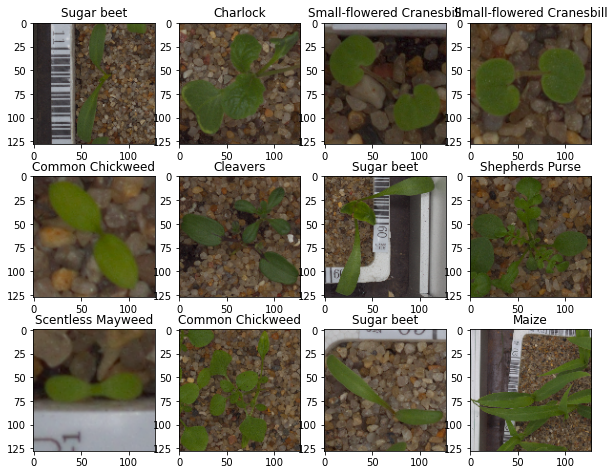

In [ ]:
plot_images(images,labels)

### Checking the distribution of the target variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

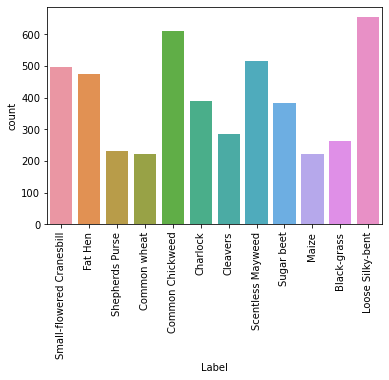

In [ ]:
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')

- As you can observe from the above plot, the dataset is imbalanced.
- So we can try to use data augmentation techniques or use appropriate evaluation methods like confusion matrix, precision and recall to evaluate the model which is trained on imbalanced data.

## Data Pre-Processing

### Converting the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

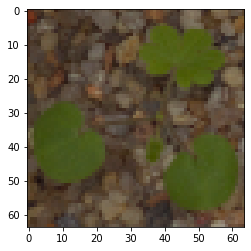

In [ ]:
plt.imshow(images_decreased[8])

### Data Preparation for Modeling

**Splitting the dataset**

- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.


In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encoding the target labels

In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>


In [ ]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Creating two similar convolution and max-pooling layers
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

<b> Fitting the model on the train data

In [ ]:
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 32s - loss: 2.4671 - accuracy: 0.1222 - val_loss: 2.4565 - val_accuracy: 0.1379 - 32s/epoch - 266ms/step
Epoch 2/30
121/121 - 31s - loss: 2.4442 - accuracy: 0.1295 - val_loss: 2.4286 - val_accuracy: 0.1379 - 31s/epoch - 256ms/step
Epoch 3/30
121/121 - 29s - loss: 2.4246 - accuracy: 0.1341 - val_loss: 2.3220 - val_accuracy: 0.1285 - 29s/epoch - 236ms/step
Epoch 4/30
121/121 - 29s - loss: 2.2625 - accuracy: 0.1931 - val_loss: 2.0462 - val_accuracy: 0.2617 - 29s/epoch - 237ms/step
Epoch 5/30
121/121 - 29s - loss: 2.0001 - accuracy: 0.2961 - val_loss: 1.8378 - val_accuracy: 0.4019 - 29s/epoch - 237ms/step
Epoch 6/30
121/121 - 29s - loss: 1.8766 - accuracy: 0.3353 - val_loss: 1.6436 - val_accuracy: 0.4369 - 29s/epoch - 240ms/step
Epoch 7/30
121/121 - 29s - loss: 1.7995 - accuracy: 0.3618 - val_loss: 1.5491 - val_accuracy: 0.4766 - 29s/epoch - 239ms/step
Epoch 8/30
121/121 - 29s - loss: 1.7048 - accuracy: 0.3936 - val_loss: 1.4349 - val_accuracy: 0.5117 - 29s/epoch - 244

**Model Evaluation**

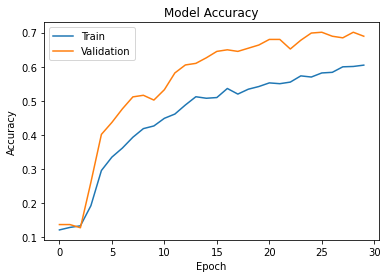

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   We can see from the above plot that **the training accuracy of the  model was not good(63%) but the validation accuracy was good(71%).**
*   The shows that the model is not stable.
* Let's check the model performance on test set.





**Evaluating the model on test data**

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.1077 - accuracy: 0.6737 - 918ms/epoch - 61ms/step


**Plotting the Confusion Matrix**





*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





In [ ]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

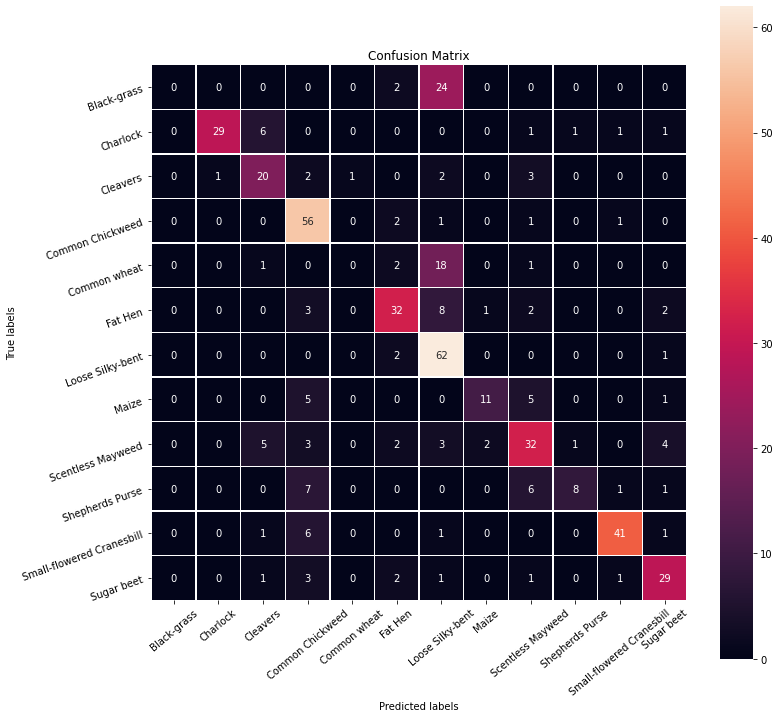

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly.
- In comparison to the rest, we can see that classes common wheat,  black-grass, and shepherds-purse are not well classified.
- We can also observe that classification of black-grass is not being done, the black-grass is usually thin so it might even be a reason as the classifier is not able to classify this class.

In [ ]:
from sklearn import metrics
#Accuracy as per the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.97      0.74      0.84        39
           2       0.59      0.69      0.63        29
           3       0.66      0.92      0.77        61
           4       0.00      0.00      0.00        22
           5       0.73      0.67      0.70        48
           6       0.52      0.95      0.67        65
           7       0.79      0.50      0.61        22
           8       0.62      0.62      0.62        52
           9       0.80      0.35      0.48        23
          10       0.91      0.82      0.86        50
          11       0.72      0.76      0.74        38

    accuracy                           0.67       475
   macro avg       0.61      0.58      0.58       475
weighted avg       0.64      0.67      0.64       475



<b> Deleting the model and history variable to use the RAM efficiently

In [ ]:
del model1
del history_1

## Model Performance Improvement

**Reducing the Learning Rate:**

**ReduceLRonPlateau()** is a function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**


Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

<b> Fitting the model on the train data

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 13s 214ms/step - loss: 2.2270 - accuracy: 0.1964 - val_loss: 2.4109 - val_accuracy: 0.2921 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 12s 203ms/step - loss: 1.8297 - accuracy: 0.3603 - val_loss: 2.3219 - val_accuracy: 0.2407 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 12s 206ms/step - loss: 1.5972 - accuracy: 0.4277 - val_loss: 2.1906 - val_accuracy: 0.2967 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 12s 205ms/step - loss: 1.4914 - accuracy: 0.4652 - val_loss: 2.0876 - val_accuracy: 0.4089 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 13s 213ms/step - loss: 1.4088 - accuracy: 0.4956 - val_loss: 1.8632 - val_accuracy: 0.4299 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 13s 223ms/step - loss: 1.3019 - accuracy: 0.5371 - val_loss: 1.6746 - val_accuracy: 0.4229 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 13s 214ms/st

**Model Evaluation**

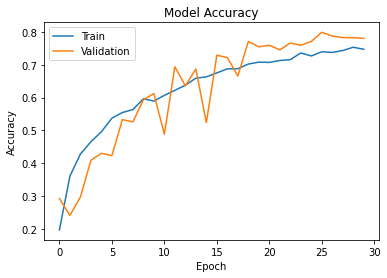

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.7542 - accuracy: 0.7832 - 421ms/epoch - 28ms/step


* We can observe that our accuracy has improved compared to our previous model.
* The model is giving a generalized performance.

**Plotting the Confusion Matrix**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

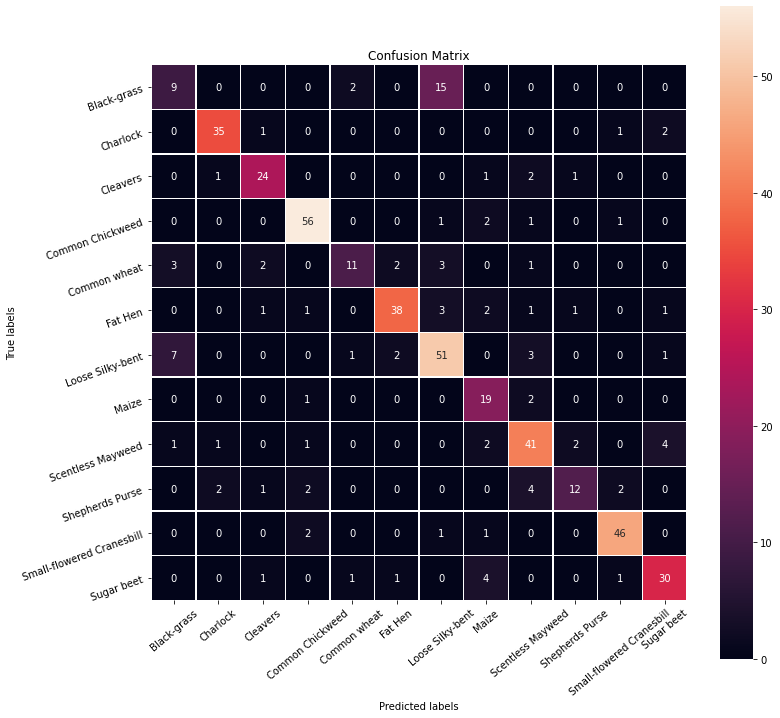

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Observation:**
- The confusion matrix appears to be improving as well, however there is still some confusion with the black-grass, common-wheat and shepherds purse species.
- The black-grass and common wheat class is the most confused class among all.
- We can observe that this model has outperformed our previous model and this has given improved performance than our previous model.

**Plotting Classification Report**

In [ ]:
#Accuracy as per the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.45      0.35      0.39        26
           1       0.90      0.90      0.90        39
           2       0.80      0.83      0.81        29
           3       0.89      0.92      0.90        61
           4       0.73      0.50      0.59        22
           5       0.88      0.79      0.84        48
           6       0.69      0.78      0.73        65
           7       0.61      0.86      0.72        22
           8       0.75      0.79      0.77        52
           9       0.75      0.52      0.62        23
          10       0.90      0.92      0.91        50
          11       0.79      0.79      0.79        38

    accuracy                           0.78       475
   macro avg       0.76      0.75      0.75       475
weighted avg       0.78      0.78      0.78       475



## Visualizing the prediction with the best model

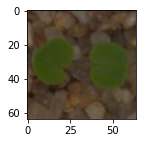

Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


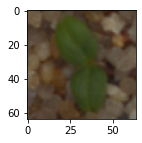

Predicted Label ['Cleavers']
True Label Cleavers


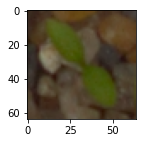

Predicted Label ['Common Chickweed']
True Label Common Chickweed


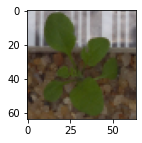

Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

**Observations**
- We observe that all the above images were classified correctly.
- This shows that data augmentation has helped in creating a generalized model.

## Actionable Insights and Business Recommendations

In [ ]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation'],'Train Accuracy':['44%','75%'],'Validation Accuracy':['61%','72%'],'Test Accuracy':['60%','70%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,44%,61%,60%
1,CNN Model with Data Augmentation,75%,72%,70%


- We can observe that our second model is the best model as it predicted the majority of the classes correctly and also provided better accuracy.
- The performance of the model is generalized as the training accuracy is 75% and the test accuracy is 70%.
- Data Augmentation has also helped in improving the overall model performance.
- The model seems to be struggling in predicting the 'Black-grass' plant seeds as it has the most misclassifications.

# **Additional** -  Transfer Learning using VGG16

- We will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.


In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))   # Importing the VGG16 Model with pretrained ImageNet weights
vgg_model.summary()                                                                   # Summary of the VGG16 Model without the dense layers

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model3.add(Flatten())

# Adding a dense layer
model3.add(Dense(32, activation='relu'))
# Adding droput layer with 0.2 dropout rate
model3.add(Dropout(0.2))
model3.add(Dense(16, activation='relu'))
# Adding the output layer with 12 neurons
model3.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,780,988
Trainable params: 66,300
Non-tr

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64
# Fit the model with augmented data
history_vgg16 = model3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/30
60/60 [==============================] - 10s 140ms/step - loss: 2.3025 - accuracy: 0.2004 - val_loss: 2.1139 - val_accuracy: 0.2874
Epoch 2/30
60/60 [==============================] - 7s 109ms/step - loss: 2.0670 - accuracy: 0.2979 - val_loss: 1.9253 - val_accuracy: 0.3341
Epoch 3/30
60/60 [==============================] - 7s 109ms/step - loss: 1.8894 - accuracy: 0.3373 - val_loss: 1.7927 - val_accuracy: 0.3668
Epoch 4/30
60/60 [==============================] - 6s 108ms/step - loss: 1.7731 - accuracy: 0.3740 - val_loss: 1.7126 - val_accuracy: 0.3879
Epoch 5/30
60/60 [==============================] - 7s 108ms/step - loss: 1.6765 - accuracy: 0.3992 - val_loss: 1.6330 - val_accuracy: 0.4159
Epoch 6/30
60/60 [==============================] - 7s 112ms/step - loss: 1.6198 - accuracy: 0.4237 - val_loss: 1.6031 - val_accuracy: 0.4229
Epoch 7/30
60/60 [==============================] - 7s 108ms/step - loss: 1.5466 - accuracy: 0.4441 - val_loss: 1.5498 - val_accuracy: 0.4439
Epoch

### Plotting the Epoch vs Accuracy curve

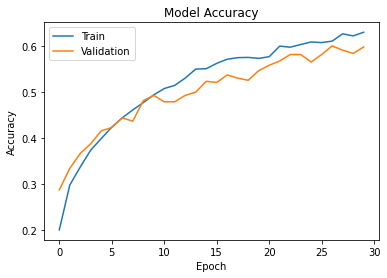

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Observations
- We can observe that the VGG16 model is generalized with good accuracy but it is not better than our previous model(model-2).

### Accuracy of the VGG16 Model

In [ ]:
# Getting the accuracy of the model
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.2153 - accuracy: 0.5979 - 1s/epoch - 70ms/step


In [ ]:
# Here we would get the output as probablities for each category
y_pred=model3.predict(X_test_normalized)

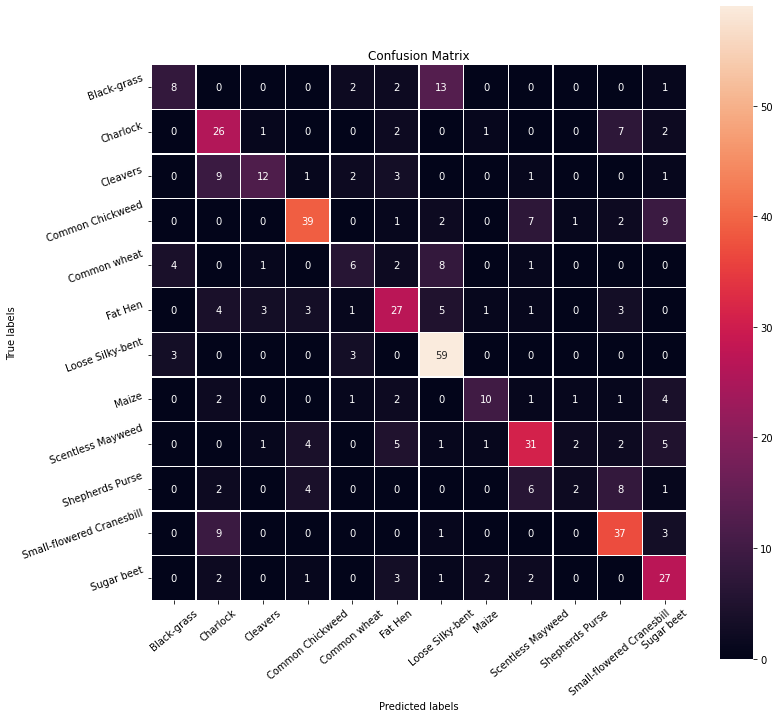

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

### Observations
- According to the confusion matrix and accuracy curve, the VGG16 model does not outperform Model-2. This could be due to the data we're using; since we're using plant seedlings data, there's a chance that these images aren't in the ImageNet dataset, whose weights have been used to build our CNN model.
- Although VGGnet did not outperform Model-2, it is evident that simply employing the transfer learning model without any tuning performed can produce a better outcome than any ordinary CNN.
- Thus we can say that Model-2 is our best model and we can use it model to classify plant seedlings.


### Comparing the model performance

In [ ]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],'Train Accuracy':['44%','75%','63%'],'Validation Accuracy':['61%','72%','60%'],'Test Accuracy':['60%','70%','60%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,44%,61%,60%
1,CNN Model with Data Augmentation,75%,72%,70%
2,Transfer Learning Model,63%,60%,60%


* Transfer learning model provided a generalized performance as compared to the base CNN model.
* Model-2 with data augmentation outperformed the other two models.